# Bruno Gomes Coelho - 9791160

**OBS**: Estamos usando o conjunto de dados dos veículos

In [118]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from scipy.stats import multivariate_normal

In [25]:
#features = pd.read_csv('BreastCancer.csv', header=(0))
#features = pd.read_csv('Iris.csv', header=(0))
features = pd.read_csv('Vehicle.csv', header=(0))
features = features.dropna(axis='rows') #remove NaN
classes = pd.unique(features[features.columns[-1]]) #name of the clases
classes = np.array(classes, dtype=str) # convert to an array


In [26]:
features.shape

(846, 19)

In [27]:
features.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [28]:
list_labels = list(features.columns)
Y = np.array(features[list_labels[-1]],dtype=str)

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop(list_labels[-1], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
X = np.array(features)

In [29]:
X.shape, Y.shape

((846, 18), (846,))

In [36]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
p = 0.7
train_x, test_x, train_y, test_y = train_test_split(X, Y, 
                                                    test_size=1-p, 
                                                    random_state=42)


# KNN

In [37]:
def run_model(train_x, test_x, train_y, test_y, model):
    model.fit(train_x,train_y)
    pred_y = model.predict(test_x) 

    score = accuracy_score(pred_y, test_y)
    return score
    print('Accuracy:', score)


## Exercício: Verifique a acurácia para os casos sem normalização e com padronização.

In [68]:
# Sem normalização
score = run_model(train_x, test_x, train_y, test_y, KNeighborsClassifier())

In [69]:
# Com Padronização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x_std = scaler.fit_transform(train_x)
test_x_std = scaler.transform(test_x)
score_std = run_model(train_x_std, test_x_std, train_y, test_y, KNeighborsClassifier())

/home/bcoelho/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/bcoelho/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/bcoelho/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Text(0, 0.5, 'Acurácia')

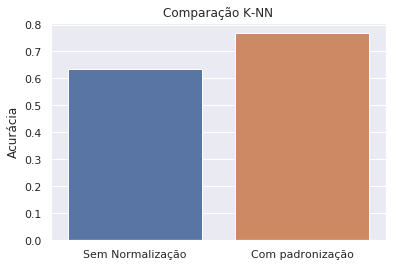

In [70]:
sns.barplot(x=["Sem Normalização", "Com padronização"], y=[score, score_std])
plt.title("Comparação K-NN")
plt.ylabel("Acurácia")

Como podemos ver o resultado foi melhor com padronização

## Exercício: Verifique a acurácia em função da fração de elementos no conjunto de treinamento.

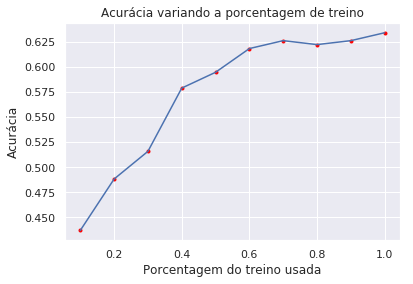

In [49]:
fractions = [x/10 for x in range(1, 11)]
scores = []
for frac in fractions:
    idx = pd.DataFrame(train_x).sample(frac=frac).index
    
    scores.append(run_model(train_x[idx], test_x, 
                            train_y[idx], test_y, KNeighborsClassifier()))
    
plt.plot(fractions, scores, ".", color="red")
sns.lineplot(x=fractions, y=scores)
plt.title("Acurácia variando a porcentagem de treino")
plt.xlabel("Porcentagem do treino usada");
plt.ylabel("Acurácia");

## Exercício: Compare a acurácia para as distâncias: euclidiana, manhattan, mahalanobis e chebyshev em função de k.


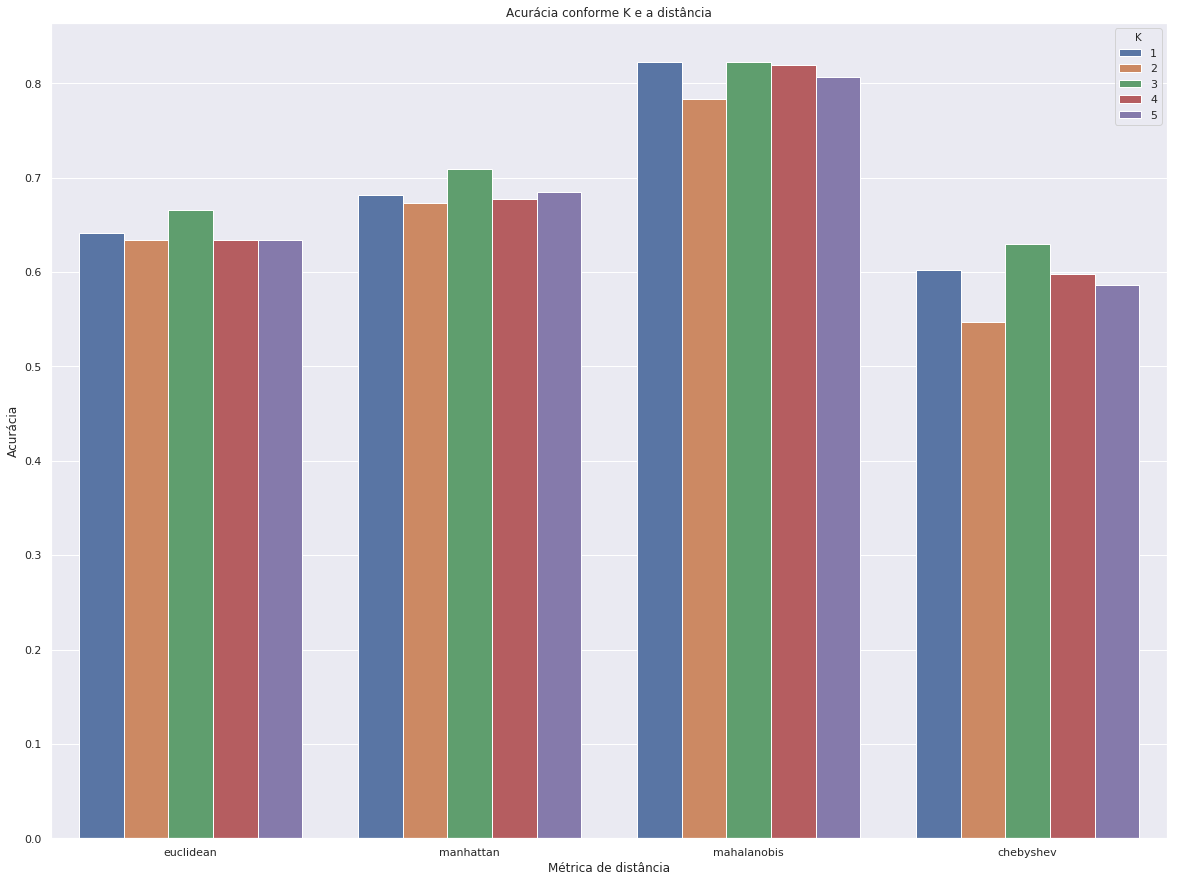

In [58]:
metrics = ["euclidean", "manhattan", "mahalanobis", "chebyshev"]
results = pd.DataFrame(columns=["score", "K", "Distance"])
ks = [x for x in range(1, 6)]

for k in ks:
    for dist in metrics:
        if dist == "mahalanobis":
            model = KNeighborsClassifier(n_neighbors=k, metric=dist, 
                                         metric_params={'V': np.cov(train_x.T)})
        else:
            model = KNeighborsClassifier(n_neighbors=k, metric=dist)
        score = run_model(train_x, test_x, train_y, test_y, model)
        results.loc[len(results)] = [score, k, dist]

plt.figure(figsize=(20, 15))
sns.barplot(x="Distance", y="score", data=results, hue="K")
plt.title("Acurácia conforme K e a distância")
plt.xlabel("Métrica de distância");
plt.ylabel("Acurácia");

- - - 
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Classificador Bayesiano

In [108]:
def my_bayesian(train_x, test_x, train_y, test_y):
    classes = np.unique(train_y)
    P = pd.DataFrame(data=np.zeros((test_x.shape[0], len(classes))), columns=classes)

    for i in np.arange(0, len(classes)):
        elements = tuple(np.where(train_y == classes[i]))
        Z = train_x[elements,:][0]
        m = np.mean(Z, axis = 0)
        cv = np.cov(np.transpose(Z))
        for j in np.arange(0,test_x.shape[0]):
            x = test_x[j,:]
            pj = multivariate_normal.pdf(x, mean=m, cov=cv)
            P[classes[i]][j] = pj
    pred_y = []

    for i in np.arange(0, test_x.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        pred_y.append(classes[c])

    return accuracy_score(test_y, pred_y)


## Exercício: Verifique a acurácia para os casos sem normalização e com padronização.

In [109]:
# Sem normalização
score = my_bayesian(train_x, test_x, train_y, test_y)

In [111]:
score_std = my_bayesian(train_x_std, test_x_std, train_y, test_y)

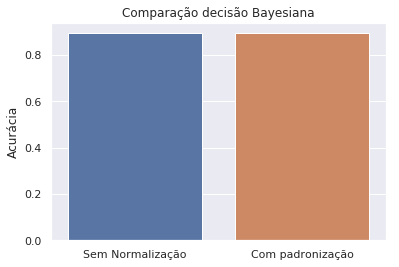

In [113]:
sns.barplot(x=["Sem Normalização", "Com padronização"], y=[score, score_std])
plt.title("Comparação decisão Bayesiana")
plt.ylabel("Acurácia");

Obtivermos o mesmo resultado - o modelo não é sensível a padronização

## Exercício: Verifique a acurácia em função da fração de elementos no conjunto de treinamento.

/home/bcoelho/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


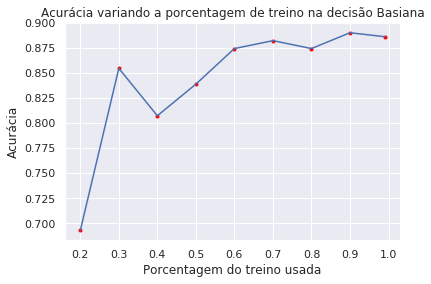

In [116]:
fractions = [x/10 for x in range(2, 10)]
fractions.append(0.99)
scores = []
for frac in fractions:
    new_x, _, new_y, _ = train_test_split(train_x, train_y, train_size=frac,
                                         stratify=train_y)
    scores.append(my_bayesian(new_x, test_x, 
                            new_y, test_y))
    
plt.plot(fractions, scores, ".", color="red")
sns.lineplot(x=fractions, y=scores)
plt.title("Acurácia variando a porcentagem de treino na decisão Basiana")
plt.xlabel("Porcentagem do treino usada");
plt.ylabel("Acurácia");

Conforme aumentamos a quantidade de dados, melhor o resultado do classificador

- - - 
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Naive Bayes

In [119]:
# Sem normalização
score = run_model(train_x, test_x, train_y, test_y, GaussianNB())

In [120]:
# Com Padronização
score_std = run_model(train_x_std, test_x_std, train_y, test_y, KNeighborsClassifier())

Text(0, 0.5, 'Acurácia')

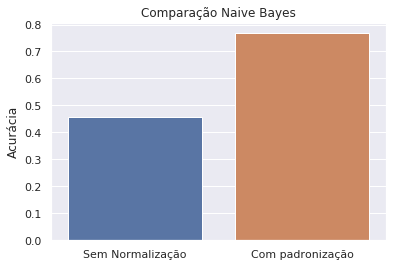

In [121]:
sns.barplot(x=["Sem Normalização", "Com padronização"], y=[score, score_std])
plt.title("Comparação Naive Bayes")
plt.ylabel("Acurácia")

Como podemos ver o resultado foi melhor com padronização

## Exercício: Verifique a acurácia em função da fração de elementos no conjunto de treinamento.

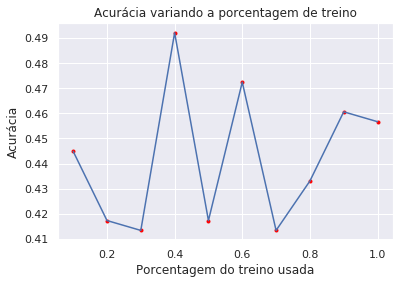

In [122]:
fractions = [x/10 for x in range(1, 11)]
scores = []
for frac in fractions:
    idx = pd.DataFrame(train_x).sample(frac=frac).index
    
    scores.append(run_model(train_x[idx], test_x, 
                            train_y[idx], test_y, GaussianNB()))
    
plt.plot(fractions, scores, ".", color="red")
sns.lineplot(x=fractions, y=scores)
plt.title("Acurácia variando a porcentagem de treino")
plt.xlabel("Porcentagem do treino usada");
plt.ylabel("Acurácia");

Percebemos que o classificador não obteve uma melhora clara em função do aumento da quantidade de dados.
